# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).


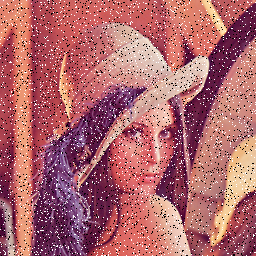

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

lenaRGBSzum = cv2.imread("lenaRGBSzum.png")

cv2_imshow(lenaRGBSzum)

2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.


In [ ]:
def rgb_median(image, window_size = 3):
  image = image.astype('float')
  offset = window_size // 2
  height, width, channels = image.shape
  filtered_image = np.zeros_like(image)

  for row in range(offset, height - offset):
    for col in range(offset, width - offset):
      window = image[row - offset : row + offset + 1 , col - offset : col + offset + 1 , :]

      pixels = window.reshape(-1, channels)

      all_distances=[]
      for i,pixel_i in enumerate(pixels):

        total_distance = 0

        for pixel_j in pixels:
          diff = pixel_i - pixel_j
          squared_diff = np.square(diff)
          distance = np.sqrt(squared_diff.sum())
          total_distance += distance

        all_distances.append(total_distance)

      min_index = np.argmin(all_distances)

      filtered_image[row,col,:] = pixels[min_index]

  return filtered_image


8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

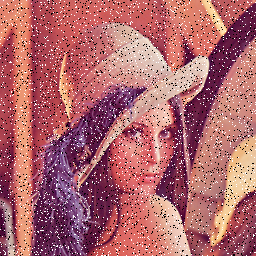

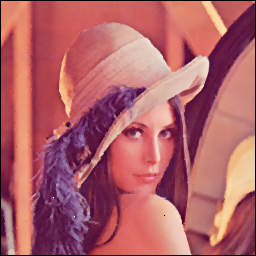

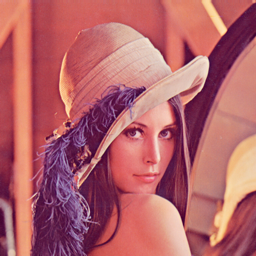

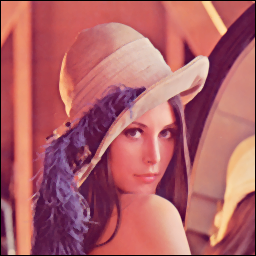

In [ ]:
cv2_imshow(lenaRGBSzum)
cv2_imshow(rgb_median(lenaRGBSzum))

lena = cv2.imread("lenaRGB.png")
cv2_imshow(lena)
cv2_imshow(rgb_median(lena))
